<!-- Guvi Datathon 1.0
Customer Conversion Prediction

Problem Statement
You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

Data
The historical sales data is available as a compressed file here.

Features:
age (numeric)
job : type of job
marital : marital status
educational_qual : education status
call_type : contact communication type
day: last contact day of the month (numeric)
mon: last contact month of year
dur: last contact duration, in seconds (numeric)
num_calls: number of contacts performed during this campaign and for this client
prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
Output variable (desired target):
y - has the client subscribed to the insurance?


Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the conversion rate. F1-Score must be used as a metric to evaluate the performance of the models.  -->

In [ ]:
# Guvi Datathon 1.0
# Customer Conversion Prediction

# Problem Statement
# You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.

# Data
# The historical sales data is available as a compressed file here.

# Features:
# age (numeric)
# job : type of job
# marital : marital status
# educational_qual : education status
# call_type : contact communication type
# day: last contact day of the month (numeric)
# mon: last contact month of year
# dur: last contact duration, in seconds (numeric)
# num_calls: number of contacts performed during this campaign and for this client
# prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
# Output variable (desired target):
# y - has the client subscribed to the insurance?


# Minimum Requirements
# It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the conversion rate. F1-Score must be used as a metric to evaluate the performance of the models.

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/train.csv")
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


#Data Cleaning

In [3]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [4]:
#Cleaning work
# Rename the column
# df=df.rename(columns={'admin.': 'admin'})

# # Print the DataFrame to verify the change
# print(df)
# Rename the column
# df = df.rename(columns={'old_column': 'new_column'})

# # Print the DataFrame to verify the change
# print(df)
# Replace the value in the column
df['job'] = df['job'].replace('admin.', 'admin')

# Print the DataFrame to verify the change
# print(df)

In [5]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [8]:
df=df.rename(columns={"mon":"month"})
df=df.rename(columns={"dur":"duration"})
df=df.rename(columns={"y":"target"})

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'month',
       'duration', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

#Data Analysis

<ipython-input-10-084798591dac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

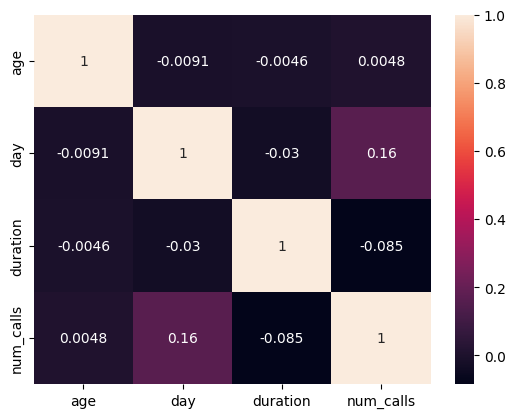

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [11]:
df.shape

(45211, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   month           45211 non-null  object
 7   duration        45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  target          45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [13]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
month             0
duration          0
num_calls         0
prev_outcome      0
target            0
dtype: int64

In [14]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
month             object
duration           int64
num_calls          int64
prev_outcome      object
target            object
dtype: object

In [15]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [16]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [17]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [18]:
df['target'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['target'].value_counts()

no     39922
yes     5289
Name: target, dtype: int64

In [20]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [21]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [22]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [23]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [24]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [25]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [26]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [27]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [28]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [29]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [30]:
df["prev_outcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

#LabelEncoding

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [32]:
label_encoder = LabelEncoder()
df['job_encoded'] = label_encoder.fit_transform(df['job'])
df['marital_encoded'] = label_encoder.fit_transform(df['marital'])
df['education_qual_encoded'] = label_encoder.fit_transform(df['education_qual'])
df['calltype_encoded'] = label_encoder.fit_transform(df['call_type'])
# Create a custom mapping dictionary
text_to_numeric = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12,
 }

# # Create a new column with the custom mapped values
df['month_encoded'] = df['month'].map(text_to_numeric)
df['prev_outcome_encoded'] = label_encoder.fit_transform(df["prev_outcome"])
df['target_encoded'] = label_encoder.fit_transform(df["target"])



In [33]:
df

,age,job,marital,education_qual,call_type,day,month,duration,num_calls,prev_outcome,target,job_encoded,marital_encoded,education_qual_encoded,calltype_encoded,month_encoded,prev_outcome_encoded,target_encoded
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,4,1,2,2,5,3,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,9,2,1,2,5,3,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,2,1,1,2,5,3,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,1,1,3,2,5,3,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,11,2,3,2,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,9,1,2,0,11,3,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,5,0,0,0,11,3,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,5,1,1,0,11,2,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,1,1,1,1,11,3,0


#Model Building


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df1=df
df1

,age,job,marital,education_qual,call_type,day,month,duration,num_calls,prev_outcome,target,job_encoded,marital_encoded,education_qual_encoded,calltype_encoded,month_encoded,prev_outcome_encoded,target_encoded
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,4,1,2,2,5,3,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,9,2,1,2,5,3,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,2,1,1,2,5,3,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,1,1,3,2,5,3,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,11,2,3,2,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,9,1,2,0,11,3,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,5,0,0,0,11,3,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,5,1,1,0,11,2,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,1,1,1,1,11,3,0


In [36]:
df.drop(columns=["job","marital","education_qual","call_type","month","prev_outcome","target"],axis=1,inplace=True)
df

,age,day,duration,num_calls,job_encoded,marital_encoded,education_qual_encoded,calltype_encoded,month_encoded,prev_outcome_encoded,target_encoded
0,58,5,261,1,4,1,2,2,5,3,0
1,44,5,151,1,9,2,1,2,5,3,0
2,33,5,76,1,2,1,1,2,5,3,0
3,47,5,92,1,1,1,3,2,5,3,0
4,33,5,198,1,11,2,3,2,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,977,3,9,1,2,0,11,3,1
45207,71,17,456,2,5,0,0,0,11,3,1
45208,72,17,1127,5,5,1,1,0,11,2,1
45209,57,17,508,4,1,1,1,1,11,3,0


<Axes: >

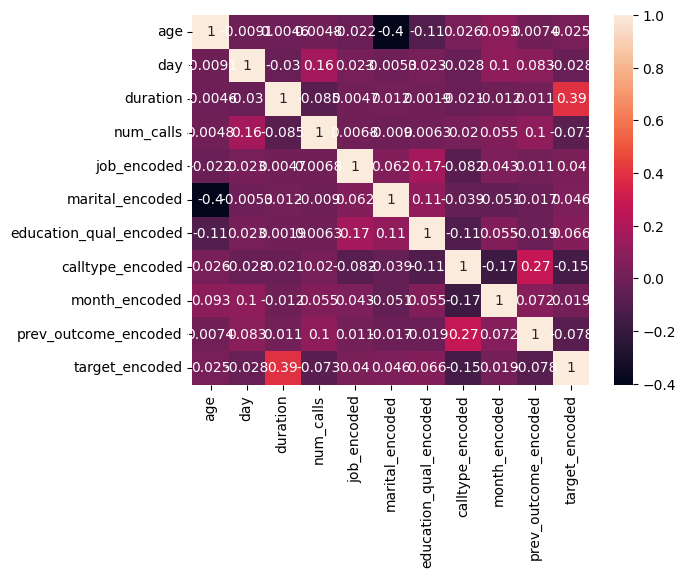

In [37]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [38]:
X=df[["age","job_encoded","marital_encoded","education_qual_encoded","calltype_encoded","day","month_encoded","duration","num_calls","prev_outcome_encoded"]]
y=df["target_encoded"]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target_encoded, Length: 45211, dtype: int64

In [39]:
X

,age,job_encoded,marital_encoded,education_qual_encoded,calltype_encoded,day,month_encoded,duration,num_calls,prev_outcome_encoded
0,58,4,1,2,2,5,5,261,1,3
1,44,9,2,1,2,5,5,151,1,3
2,33,2,1,1,2,5,5,76,1,3
3,47,1,1,3,2,5,5,92,1,3
4,33,11,2,3,2,5,5,198,1,3
...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,17,11,977,3,3
45207,71,5,0,0,0,17,11,456,2,3
45208,72,5,1,1,0,17,11,1127,5,2
45209,57,1,1,1,1,17,11,508,4,3


In [40]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target_encoded, Length: 45211, dtype: int64

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print("X_train",X_train.shape,"X_test",X_test.shape,"y_train",y_train.shape,"y_test",y_test.shape)

X_train (31647, 10) X_test (13564, 10) y_train (31647,) y_test (13564,)


#Converting to imbalanced to balanced

In [46]:
y.value_counts()

0    39922
1     5289
Name: target_encoded, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

# Assuming you have your data stored in X (features) and y (target variable)
# X is your feature matrix and y is the corresponding target vector

# Instantiate the SMOTE object
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_train, y_train = smote.fit_resample(X_train, y_train)

# Print the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
# print(y_resampled.value_counts())


Class distribution after applying SMOTE:


In [48]:
from imblearn.over_sampling import SMOTE

# Assuming you have your data stored in X (features) and y (target variable)
# X is your feature matrix and y is the corresponding target vector

# Instantiate the SMOTE object
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_test, y_test = smote.fit_resample(X_test, y_test)

# Print the class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
# print(y_resampled.value_counts())

Class distribution after applying SMOTE:


In [ ]:
X_train

,age,job_encoded,marital_encoded,education_qual_encoded,calltype_encoded,day,month_encoded,duration,num_calls,prev_outcome_encoded
0,58,4,1,0,2,18,11,205,1,3
1,55,1,1,3,0,21,8,168,2,3
2,50,0,1,1,2,7,5,216,2,3
3,43,4,1,0,0,17,7,63,6,3
4,53,9,0,2,2,16,5,512,6,3
...,...,...,...,...,...,...,...,...,...,...
55901,30,5,2,2,0,6,9,231,1,1
55902,57,7,0,1,0,2,2,262,1,1
55903,41,6,0,1,0,14,5,669,3,0
55904,30,4,2,1,0,6,4,576,2,3


In [49]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
55901    1
55902    1
55903    1
55904    1
55905    1
Name: target_encoded, Length: 55906, dtype: int64

In [ ]:
X_test

,age,job_encoded,marital_encoded,education_qual_encoded,calltype_encoded,day,month_encoded,duration,num_calls,prev_outcome_encoded
0,37,4,1,2,0,10,7,91,15,3
1,36,7,2,1,0,14,4,1073,1,3
2,47,1,1,0,1,8,7,243,5,3
3,57,3,1,0,0,11,2,105,7,0
4,33,1,1,1,0,14,7,332,2,3
...,...,...,...,...,...,...,...,...,...,...
23933,43,0,1,1,0,27,5,186,2,2
23934,28,5,1,1,0,3,5,1083,2,2
23935,28,5,2,1,0,3,3,256,1,1
23936,48,5,1,1,1,3,10,199,1,2


In [ ]:
y_test

0        0
1        1
2        0
3        0
4        0
        ..
23933    1
23934    1
23935    1
23936    1
23937    1
Name: target_encoded, Length: 23938, dtype: int64

In [ ]:
X_test.value_counts()

age  job_encoded  marital_encoded  education_qual_encoded  calltype_encoded  day  month_encoded  duration  num_calls  prev_outcome_encoded
50   7            1                0                       0                 7    5              661       1          1                       5
28   7            1                1                       0                 15   5              436       2          1                       5
32   5            1                1                       0                 2    6              327       1          2                       4
31   9            1                1                       0                 3    6              121       3          2                       4
44   2            1                1                       0                 9    10             248       1          2                       4
                                                                                                                                             

In [50]:
y_test.value_counts()

0    11969
1    11969
Name: target_encoded, dtype: int64

In [ ]:
X_train.value_counts()

age  job_encoded  marital_encoded  education_qual_encoded  calltype_encoded  day  month_encoded  duration  num_calls  prev_outcome_encoded
33   4            2                2                       0                 20   4              163       1          3                       7
32   0            1                1                       0                 21   5              521       1          2                       6
24   8            2                1                       0                 18   2              185       1          3                       6
33   5            1                1                       0                 10   3              215       2          2                       5
31   4            1                2                       0                 22   3              247       3          2                       5
                                                                                                                                             

In [51]:
y_train.value_counts()

0    27953
1    27953
Name: target_encoded, dtype: int64

#Standard Scaler

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [53]:
X_train=scaler.fit_transform(X_train)
# y_train=scaler.fit_transform(y_train_smote)
X_test=scaler.fit_transform(X_test)
# y_test=scaler.fit_transform(y_test_smote)

In [54]:
X_train

array([[ 1.48170376, -0.10250372, -0.15763209, ..., -0.49623075,
        -0.51902223,  0.62363042],
       [ 1.2223562 , -1.07891757, -0.15763209, ..., -0.60062534,
        -0.1238534 ,  0.62363042],
       [ 0.79011026, -1.40438885, -0.15763209, ..., -0.46519452,
        -0.1238534 ,  0.62363042],
       ...,
       [-0.85242431,  1.5248527 , -0.15763209, ...,  0.69161043,
        -0.51902223, -0.3698635 ],
       [ 2.51909401,  0.22296757, -0.15763209, ...,  0.25992468,
        -0.51902223, -0.3698635 ],
       [-0.76597512,  1.5248527 , -0.15763209, ...,  0.21478107,
        -0.1238534 , -1.36335742]])

In [55]:
X_test

array([[-0.35109756, -0.09906034, -0.17504941, ..., -0.81224414,
         4.86317389,  0.63796926],
       [-0.43677458,  0.89394908,  1.4701539 , ...,  1.96132474,
        -0.52471874,  0.63796926],
       [ 0.50567268, -1.09206977, -0.17504941, ..., -0.38293409,
         1.01467916,  0.63796926],
       ...,
       [ 0.76270375,  0.56294594, -0.17504941, ...,  0.93041574,
        -0.52471874, -1.32484908],
       [ 1.70515101,  0.2319428 , -0.17504941, ..., -0.40552935,
        -0.13986926, -0.34343991],
       [-1.03651375,  0.2319428 ,  1.4701539 , ..., -0.4224758 ,
        -0.52471874, -1.32484908]])

In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
55901    1
55902    1
55903    1
55904    1
55905    1
Name: target_encoded, Length: 55906, dtype: int64

#Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [57]:
predict_target=model.predict(X_test)
predict_target

array([0, 1, 0, ..., 1, 1, 1])

In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict_target))

0.7874509148633971


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict_target))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     11969
           1       0.78      0.80      0.79     11969

    accuracy                           0.79     23938
   macro avg       0.79      0.79      0.79     23938
weighted avg       0.79      0.79      0.79     23938



In [60]:
cross_check=pd.crosstab(y_test,predict_target)
cross_check

col_0,0,1
target_encoded,,
0,9221,2748
1,2340,9629


In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predict_target))

[[9221 2748]
 [2340 9629]]


#Threshold Adjustment

In [62]:
import numpy as np

In [63]:
def predict_threshold(model,X_test,thresholds):
  return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [64]:
for thr in np.arange(0,1.0,0.1):
  y_predict_threshold=predict_threshold(model,X_test,thr)
  print("Threshold:",thr)
  print(confusion_matrix(y_test,y_predict_threshold))

Threshold: 0.0
[[    0 11969]
 [    0 11969]]
Threshold: 0.1
[[ 4104  7865]
 [   76 11893]]
Threshold: 0.2
[[ 5399  6570]
 [  318 11651]]
Threshold: 0.30000000000000004
[[ 6821  5148]
 [  660 11309]]
Threshold: 0.4
[[ 8145  3824]
 [ 1262 10707]]
Threshold: 0.5
[[9221 2748]
 [2340 9629]]
Threshold: 0.6000000000000001
[[10155  1814]
 [ 3952  8017]]
Threshold: 0.7000000000000001
[[10811  1158]
 [ 5552  6417]]
Threshold: 0.8
[[11304   665]
 [ 7145  4824]]
Threshold: 0.9
[[11632   337]
 [ 8878  3091]]


#KNN Algorithms

In [65]:
from sklearn import metrics

In [66]:
from sklearn.neighbors import KNeighborsClassifier
k=2
model=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=2)

In [67]:
y_predict=model.predict(X_test)
y_predict

array([0, 1, 0, ..., 0, 1, 1])

In [68]:
print(metrics.accuracy_score(y_test,y_predict))

0.8011947531122066


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82     11969
           1       0.91      0.67      0.77     11969

    accuracy                           0.80     23938
   macro avg       0.82      0.80      0.80     23938
weighted avg       0.82      0.80      0.80     23938



#SVC Algorithms

In [70]:
from sklearn import svm
sv_model=svm.SVC(kernel="rbf")
sv_model.fit(X_train,y_train)

SVC()

In [71]:
y_predict=sv_model.predict(X_test)
y_predict

array([0, 1, 0, ..., 1, 1, 1])

In [72]:
sv_model.score(X_test,y_test)

0.8722533210794553

In [73]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11969
           1       0.87      0.87      0.87     11969

    accuracy                           0.87     23938
   macro avg       0.87      0.87      0.87     23938
weighted avg       0.87      0.87      0.87     23938



In [74]:
cross_check=pd.crosstab(y_test,y_predict)
cross_check

col_0,0,1
target_encoded,,
0,10412,1557
1,1501,10468


In [75]:
print(confusion_matrix(y_test,y_predict))

[[10412  1557]
 [ 1501 10468]]


#Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier(criterion="gini")
model_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
y_predict_tree=model.predict(X_test)
y_predict_tree

array([0, 1, 0, ..., 0, 1, 1])

In [78]:
print(metrics.accuracy_score(y_test,y_predict_tree))

0.8011947531122066


In [79]:
cross_check=pd.crosstab(y_test,y_predict_tree)
cross_check

col_0,0,1
target_encoded,,
0,11127,842
1,3917,8052


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_tree))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82     11969
           1       0.91      0.67      0.77     11969

    accuracy                           0.80     23938
   macro avg       0.82      0.80      0.80     23938
weighted avg       0.82      0.80      0.80     23938



#Random Forest

In [81]:
from sklearn.ensemble import BaggingClassifier
tree=DecisionTreeClassifier()
model_random_forest=BaggingClassifier(estimator=tree,n_estimators=100,random_state=42)
model_random_forest.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [82]:
y_predict_random=model_random_forest.predict(X_test)
y_predict_random

array([0, 1, 0, ..., 1, 1, 1])

In [83]:
print(metrics.accuracy_score(y_test,y_predict_random))

0.8720026735733979


In [84]:
cross_check=pd.crosstab(y_test,y_predict_random)
cross_check

col_0,0,1
target_encoded,,
0,10945,1024
1,2040,9929


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_random))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     11969
           1       0.91      0.83      0.87     11969

    accuracy                           0.87     23938
   macro avg       0.87      0.87      0.87     23938
weighted avg       0.87      0.87      0.87     23938



#GradientBoostingClassifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
grad_boost_clf=GradientBoostingClassifier(n_estimators=100,random_state=42)
grad_boost_clf.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [87]:
y_predict_grad=grad_boost_clf.predict(X_test)
y_predict_grad

array([0, 1, 0, ..., 1, 1, 1])

In [88]:
print(metrics.accuracy_score(y_test,y_predict_grad))

0.8801904921046035


In [89]:
cross_check=pd.crosstab(y_test,y_predict_grad)
cross_check

col_0,0,1
target_encoded,,
0,10362,1607
1,1261,10708


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_grad))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     11969
           1       0.87      0.89      0.88     11969

    accuracy                           0.88     23938
   macro avg       0.88      0.88      0.88     23938
weighted avg       0.88      0.88      0.88     23938

